In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
#import an image
image1 = plt.imread('Lenna.jpg')
image2 = plt.imread('Abstract.png')

In [73]:
image1.shape == image2.shape

True

In [74]:
image1.dtype

dtype('float32')

In [75]:
image1

array([[[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       [[0.8862745 , 0.5372549 , 0.49019608],
        [0.8862745 , 0.5372549 , 0.49019608],
        [0.8745098 , 0.5372549 , 0.52156866],
        ...,
        [0.9019608 , 0.5803922 , 0.47843137],
        [0.8666667 , 0.50980395, 0.43137255],
        [0.78431374, 0.3882353 , 0.3529412 ]],

       ...,

       [[0.32941177, 0.07058824, 0.23529412],
        [0.32941177, 0.07058824, 0.23529412],
        [0.36078432, 0

In [4]:
shape = image1.shape

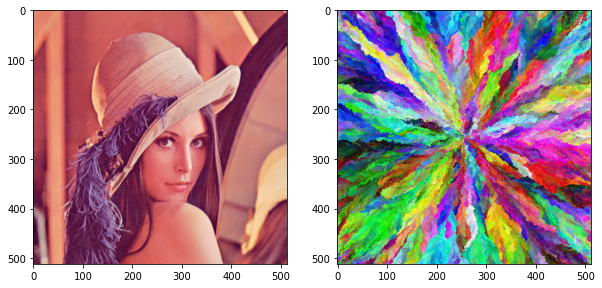

In [5]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(image1)
plt.subplot(122)
plt.imshow(image2)

In [58]:
image1_reshaped = np.reshape(image1, -1)
image2_reshaped = np.reshape(image2, -1)

In [59]:
image1_fft = np.fft.fft(image1_reshaped)
image2_fft = np.fft.fft(image2_reshaped)

In [107]:
image1_angle = np.angle(image1_fft)
image2_angle = np.angle(image2_fft)

image1_mag = np.abs(image1_fft)
image2_mag = np.abs(image2_fft)

image1_real = np.real(image1_fft)
image2_real = np.real(image2_fft)

image1_imag = np.imag(image1_fft)
image2_imag = np.imag(image2_fft)

In [108]:
print(image1_real)
print(image2_imag)

[395462.35364284  -1186.99494963  -5051.03232058 ...   5432.96545488
  -5051.03232058  -1186.99494963]
[     0.         -23271.51864932  19376.31766615 ...   5258.63337823
 -19376.31766615  23271.51864932]


In [109]:
combined1 = np.multiply(image2_mag, np.exp(0.5* 1j * image1_angle))
real_combined1 =  np.real(np.fft.ifft(combined1))

combined3 = image1_real + 1j * image2_imag
real_combined3 =  np.real(np.fft.ifft(combined3))

image2_mag = np.abs(image2_fft) * 0.5
combined2 = np.multiply(image2_mag, np.exp(1j * image1_angle))
real_combined2 =  np.real(np.fft.ifft(combined2))

In [110]:
combined_reshaped1 = real_combined1.reshape(shape)

combined_reshaped2 = real_combined2.reshape(shape)

combined_reshaped3 = real_combined3.reshape(shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


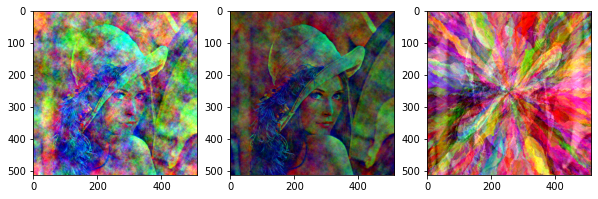

In [112]:
plt.figure(figsize=(10, 15))
plt.subplot(131)
plt.imshow(combined_reshaped1)
plt.subplot(132)
plt.imshow(combined_reshaped2)
plt.subplot(133)
plt.imshow(combined_reshaped3)